Khởi tạo đồ thị

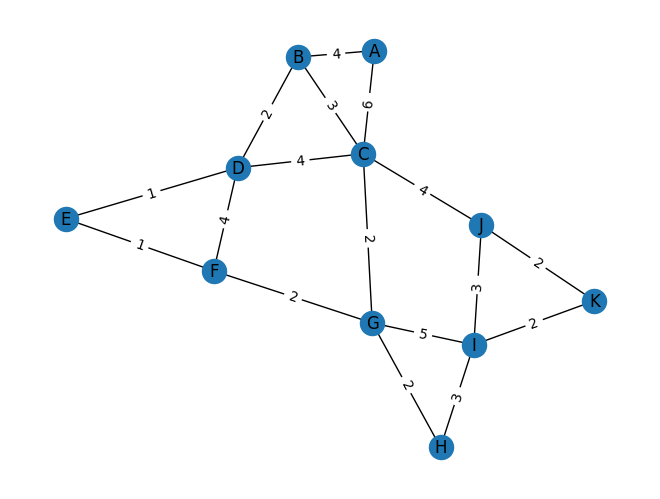

In [4]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

#khởi tạo đồ thị
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('B', 'C', weight=3)
G.add_edge('A', 'C', weight=6)
G.add_edge('C', 'D', weight=4)
G.add_edge('C', 'G', weight=2)
G.add_edge('C', 'J', weight=4)
G.add_edge('D', 'E', weight=1)
G.add_edge('E', 'F', weight=1)
G.add_edge('D', 'F', weight=4)
G.add_edge('F', 'G', weight=2)
G.add_edge('G', 'H', weight=2)
G.add_edge('G', 'I', weight=5)
G.add_edge('H', 'I', weight=3)
G.add_edge('I', 'J', weight=3)
G.add_edge('I', 'K', weight=2)
G.add_edge('J', 'K', weight=2)

Start = 'A'
End = 'K'


#vẽ đồ thị
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Thuật toán BFS:
- Đặt đỉnh xuất phát vào hàng đợi.
- Đánh dấu đỉnh đã thăm.
- Duyệt đồ thị:
    Trong khi hàng đợi không rỗng:
    Lấy đỉnh đầu hàng đợi ra.
    Xét tất cả đỉnh kề của nó:
    Nếu đỉnh kề chưa được thăm, thêm vào hàng đợi và đánh dấu đã thăm.
    Nếu gặp đỉnh đích thì dừng lại.
    Nếu hàng đợi rỗng mà vẫn chưa tìm thấy đích, nghĩa là không có đường đi.

In [17]:
def BFS(graph, start, end):
    queue = deque([[start]])  # Hàng đợi chứa đường đi
    visited = set()  # Tập hợp lưu đỉnh đã thăm
    
    while queue:
        path = queue.popleft()  # Lấy đường đi đầu tiên trong hàng đợi
        node = path[-1]  # Lấy đỉnh cuối cùng trong đường đi

        if node == end:  # Nếu đến đích, trả về đường đi
            return path
        
        if node not in visited:
            visited.add(node)  # Đánh dấu đã thăm
            
            for neighbor in graph.neighbors(node):  # Lấy danh sách kề
                new_path = list(path)  # Sao chép đường đi hiện tại
                new_path.append(neighbor)  # Thêm đỉnh kề vào đường đi
                queue.append(new_path)  # Đưa vào hàng đợi
                
    return None  # Không tìm thấy đường đi

path = BFS(G, Start, End)
path

['A', 'C', 'J', 'K']

Biến `path` trong hàm BFS có tác dụng lưu trữ đường đi từ đỉnh xuất phát đến đỉnh hiện tại. Mỗi khi một đỉnh mới được thăm, `path` sẽ được sao chép và đỉnh mới sẽ được thêm vào `path` để tạo thành một đường đi mới. Nếu tìm thấy đỉnh đích, `path` sẽ chứa đường đi từ đỉnh xuất phát đến đỉnh đích và được trả về.

In [ ]:
def BFS(Graph, start, end):
    frontier = deque([[start]])  # Hàng đợi chứa đường đi
    explored = set()  # Tập hợp lưu đỉnh đã thăm

    while frontier:
        path = frontier.popleft()  # Lấy đường đi đầu tiên trong hàng đợi
        node = path[-1]

        if node == end:
            return path
        
        if node not in explored:
            explored.add(node)

            for neighbor in Graph.neighbors(node):  # Lấy danh sách kề
                new_path = list(path)
                new_path.append(neighbor)
                frontier.append(new_path)

    return None  # Không tìm thấy đường đi

path = BFS(G, Start, End)
print("BFS Path:", path)


BFS Path: ['A', 'C', 'J', 'K']


Thuật toán DFS:
- Đặt đỉnh xuất phát vào ngăn xếp.
- Đánh dấu đỉnh này là đã thăm.
- Duyệt đồ thị:
    Trong khi ngăn xếp không rỗng:
    Lấy một đỉnh ra khỏi stack
    Xét tất cả đỉnh kề của nó:
    Nếu đỉnh kề chưa được thăm, đẩy vào ngăn xếp và đánh dấu đã thăm.
    
    Nếu gặp đỉnh đích thì dừng lại.

    Nếu ngăn xếp rỗng mà vẫn chưa tìm thấy đích, nghĩa là không có đường đi.

In [ ]:
def DFS(graph, start, end):
    stack = [[start]]  # Hàng đợi chứa đường đi
    visited = set()  # Tập hợp lưu đỉnh đã thăm
    
    while stack:
        path = stack.pop()  # Lấy đỉnh cuối trong stack
        node = path[-1]  # Lấy đỉnh cuối cùng trong đường đi

        if node == end:  # Nếu đến đích, trả về đường đi
            return path
        
        if node not in visited:
            visited.add(node)  # Đánh dấu đã thăm
            
            for neighbor in graph.neighbors(node):  # Lấy danh sách kề
                new_path = list(path)  # Sao chép đường đi hiện tại
                new_path.append(neighbor)  # Thêm đỉnh kề vào đường đi
                stack.append(new_path)  # Đưa vào stack
                
    return None  # Không tìm thấy đường đi

path = DFS(G, Start, End)
path

['A', 'C', 'J', 'K']

In [8]:
def DFS(Graph, start, end):
    frontier = [[start]]
    explored = set()  # Tập hợp lưu đỉnh đã thăm
    
    while frontier:
        path = frontier.pop()
        node = path[-1]
        if node == end:
            return path
        
        if node not in explored:
            explored.add(node)
            
            for neighbor in Graph.neighbors(node):
                new_path = list(path)
                new_path.append(neighbor)
                frontier.append(new_path)
    
    return None  # Không tìm thấy đường đi

path = DFS(G, Start, End)
print("DFS Path:", path)

DFS Path: ['A', 'C', 'J', 'K']


Thuật toán UCS
- Đưa đỉnh xuất phát vào hàng đợi ưu tiên với chi phí bằng 0.
- Duyệt đồ thị:
    Trong khi hàng đợi ưu tiên không rỗng:
    Lấy đỉnh có chi phí nhỏ nhất ra.
    Nếu đỉnh này là đích → dừng lại.
    Xét tất cả đỉnh kề:
    
    Nếu đường đi mới có chi phí nhỏ hơn đường cũ, cập nhật chi phí và thêm vào hàng đợi.
    
    Nếu hàng đợi rỗng mà vẫn chưa tìm thấy đích, nghĩa là không có đường đi.

In [24]:
def UCS(graph, start, end):
    queue = [[0, start]]  # Hàng đợi chứa đường đi
    visited = set()  # Tập hợp lưu đỉnh đã thăm
    
    while queue:
        cost, path = heapq.heappop(queue)  # Lấy đường đi đầu tiên trong hàng đợi
        node = path[-1]  # Lấy đỉnh cuối cùng trong đường đi path đang xét

        if node == end:  # Nếu đến đích, trả về đường đi
            return path
        
        if node not in visited:
            visited.add(node)  # Đánh dấu đã thăm
            
            for neighbor in graph.neighbors(node):  # Lấy danh sách kề
                new_path = list(path)  # Sao chép đường đi hiện tại
                new_path.append(neighbor)  # Thêm đỉnh kề vào đường đi
                new_cost = cost + graph[node][neighbor]['weight']  # Tính chi phí mới
                heapq.heappush(queue, [new_cost, new_path])  # Đưa vào hàng đợi
                
    return None  # Không tìm thấy đường đi

path = UCS(G, Start, End)
path

['A', 'C', 'J', 'K']

In [9]:
def UCS(Graph, start, end):

    frontier = [[0, start]]  # Hàng đợi chứa đường đi
    explored = set()  # Tập hợp lưu đỉnh đã thăm

    while frontier:

        cost, path = heapq.heappop(frontier)
        node = path[-1]
        if node == end:
            return path
        
        if node not in explored:
            explored.add(node)

            for neighbor in Graph.neighbors(node):
                new_path = list(path)
                new_path.append(neighbor)
                new_cost = cost + Graph[node][neighbor]['weight']
                heapq.heappush(frontier, [new_cost, new_path])

    return None  # Không tìm thấy đường đi

path = UCS(G, Start, End)
print("UCS Path:", path)

UCS Path: ['A', 'C', 'J', 'K']
